In [1]:
# Import basic libraries.
import numpy as np
import pandas as pd

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
import re

import warnings
warnings.filterwarnings('ignore')

In [2]:
# read the book data set
books = pd.read_csv("Books.csv",encoding='latin-1') # In the data set having spaces so we us

In [3]:
ratings = pd.read_csv('Ratings.csv', encoding='latin-1')
users = pd.read_csv('Users.csv', encoding='latin-1')

In [4]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [5]:
users.rename(columns={'User-ID': 'userId'}, inplace=True)

In [6]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [7]:
ratings.rename(columns={'User-ID': 'userId', 'Book-Rating': 'bookRating'}, inplace=True)

In [8]:
print(books.shape)
print(ratings.shape)
print(users.shape)

(271360, 8)
(1149780, 3)
(278858, 3)


## Checking Books Data

In [9]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [10]:
books.duplicated().sum()

0

In [11]:
## Renaming columns
books.rename(columns={'Year-Of-Publication': 'yearOfPublication'}, inplace=True)
books.rename(columns={'Book-Title': 'bookTitle', 'Book-Author': 'bookAuthor','Publisher': 'publisher', 'Image-URL-S': 'imageUrlS', 'Image-URL-M': 'imageUrlM', 'Image-URL-L': 'imageUrlL'}, inplace=True)

In [12]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   ISBN               271360 non-null  object
 1   bookTitle          271360 non-null  object
 2   bookAuthor         271359 non-null  object
 3   yearOfPublication  271360 non-null  object
 4   publisher          271358 non-null  object
 5   imageUrlS          271360 non-null  object
 6   imageUrlM          271360 non-null  object
 7   imageUrlL          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


- Here we can see Year-Of-Publication should have dtype as int, so now we check the unique values of Year-Of-Publication using unqiue() method, so that we can see is there any data because of which our data type is converted in object

In [13]:
books.yearOfPublication.unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

- We can see that some author names are mixed in year of publication data example : 'DK Publishing Inc' and 'Gallimard'

- Now we will check the row which have 'DK Publishing Inc' as yearOfPublication

In [14]:
books.loc[books.yearOfPublication == 'DK Publishing Inc',:]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


- As we can see there are two books with mixed data, hence we will correct it

In [15]:
books.loc[books.ISBN == '078946697X','imageUrlL'] = 'http://images.amazon.com/images/P/078946697X.01.LZZZZZZZ.jpg'
books.loc[books.ISBN == '078946697X','imageUrlM'] = 'http://images.amazon.com/images/P/078946697X.01.MZZZZZZZ.jpg'
books.loc[books.ISBN == '078946697X','imageUrlS'] = 'http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg'
books.loc[books.ISBN == '078946697X','publisher'] = 'DK Publishing Inc'
books.loc[books.ISBN == '078946697X','yearOfPublication'] = '2000'
books.loc[books.ISBN == '078946697X','bookAuthor'] = 'Michael Teitelbaum'
books.loc[books.ISBN == '078946697X','bookTitle'] = 'DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)'

In [16]:
books.loc[books.ISBN == '0789466953','imageUrlL'] = 'http://images.amazon.com/images/P/0789466953.01.LZZZZZZZ.jpg'
books.loc[books.ISBN == '0789466953','imageUrlM'] = 'http://images.amazon.com/images/P/0789466953.01.MZZZZZZZ.jpg'
books.loc[books.ISBN == '0789466953','imageUrlS'] = 'http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg'
books.loc[books.ISBN == '0789466953','publisher'] = 'DK Publishing Inc'
books.loc[books.ISBN == '0789466953','yearOfPublication'] = '2000'
books.loc[books.ISBN == '0789466953','bookAuthor'] = 'James Buckley'
books.loc[books.ISBN == '0789466953','bookTitle'] = "DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)"

- Now data with 'Gallimard'

In [17]:
books.loc[books.yearOfPublication == 'Gallimard',:]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN


In [18]:
books.loc[books.ISBN == '2070426769','imageUrlL'] = 'http://images.amazon.com/images/P/2070426769.01.LZZZZZZZ.jpg'
books.loc[books.ISBN == '2070426769','imageUrlM'] = 'http://images.amazon.com/images/P/2070426769.01.MZZZZZZZ.jpg'
books.loc[books.ISBN == '2070426769','imageUrlS'] = 'http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg'
books.loc[books.ISBN == '2070426769','publisher'] = 'Gallimard'
books.loc[books.ISBN == '2070426769','yearOfPublication'] = '2003'
books.loc[books.ISBN == '2070426769','bookAuthor'] = 'Jean-Marie Gustave Le ClÃ?Â©zio'
books.loc[books.ISBN == '2070426769','bookTitle'] = "Peuple du ciel, suivi de 'Les Bergers"

In [19]:
## Verifying the change in YearOfPublication
books.loc[(books.ISBN == '2070426769') | (books.ISBN == '078946697X') | (books.ISBN == '0789466953'),: ]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",Michael Teitelbaum,2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers",Jean-Marie Gustave Le ClÃ?Â©zio,2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",James Buckley,2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...


- As we have seen that dtype of YearOfPublication is object so we will convert it into numeric dtype

In [20]:
books.yearOfPublication = pd.to_numeric(books.yearOfPublication, errors='coerce')

In [21]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   ISBN               271360 non-null  object
 1   bookTitle          271360 non-null  object
 2   bookAuthor         271359 non-null  object
 3   yearOfPublication  271360 non-null  int64 
 4   publisher          271358 non-null  object
 5   imageUrlS          271360 non-null  object
 6   imageUrlM          271360 non-null  object
 7   imageUrlL          271360 non-null  object
dtypes: int64(1), object(7)
memory usage: 16.6+ MB


In [22]:
books.yearOfPublication.unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984,    0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, 2012, 2006, 1909, 2008, 1378,
       1919, 1922, 1897, 2024, 1376, 2037], dtype=int64)

In [23]:
## Checking if any year has 0 value
books.loc[(books.yearOfPublication ==0), : ]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
176,3150000335,Kabale Und Liebe,Schiller,0,"Philipp Reclam, Jun Verlag GmbH",http://images.amazon.com/images/P/3150000335.0...,http://images.amazon.com/images/P/3150000335.0...,http://images.amazon.com/images/P/3150000335.0...
188,342311360X,Die Liebe in Den Zelten,Gabriel Garcia Marquez,0,Deutscher Taschenbuch Verlag (DTV),http://images.amazon.com/images/P/342311360X.0...,http://images.amazon.com/images/P/342311360X.0...,http://images.amazon.com/images/P/342311360X.0...
288,0571197639,Poisonwood Bible Edition Uk,Barbara Kingsolver,0,Faber Faber Inc,http://images.amazon.com/images/P/0571197639.0...,http://images.amazon.com/images/P/0571197639.0...,http://images.amazon.com/images/P/0571197639.0...
351,3596214629,"Herr Der Fliegen (Fiction, Poetry and Drama)",Golding,0,Fischer Taschenbuch Verlag GmbH,http://images.amazon.com/images/P/3596214629.0...,http://images.amazon.com/images/P/3596214629.0...,http://images.amazon.com/images/P/3596214629.0...
542,8845229041,Biblioteca Universale Rizzoli: Sulla Sponda De...,P Coelho,0,Fabbri - RCS Libri,http://images.amazon.com/images/P/8845229041.0...,http://images.amazon.com/images/P/8845229041.0...,http://images.amazon.com/images/P/8845229041.0...
...,...,...,...,...,...,...,...,...
270794,014029953X,Foe (Essential.penguin S.),J.M. Coetzee,0,Penguin Books Ltd,http://images.amazon.com/images/P/014029953X.0...,http://images.amazon.com/images/P/014029953X.0...,http://images.amazon.com/images/P/014029953X.0...
270913,0340571187,Postmens House,Maggie Hemingway,0,Trafalgar Square,http://images.amazon.com/images/P/0340571187.0...,http://images.amazon.com/images/P/0340571187.0...,http://images.amazon.com/images/P/0340571187.0...
271094,8427201079,El Misterio De Sittaford,Agatha Christie,0,Editorial Molino,http://images.amazon.com/images/P/8427201079.0...,http://images.amazon.com/images/P/8427201079.0...,http://images.amazon.com/images/P/8427201079.0...
271182,0887781721,Tom Penny,Tony German,0,P. Martin Associates,http://images.amazon.com/images/P/0887781721.0...,http://images.amazon.com/images/P/0887781721.0...,http://images.amazon.com/images/P/0887781721.0...


- The value 0 for year is invalid, so setting invalid year as NaN

In [24]:
books.loc[(books.yearOfPublication == 0),'yearOfPublication'] = np.NAN

- There are some values in Year column which is greater than Year 2023 which is invalid, so setting invalid year as NaN

In [25]:
books.loc[(books["yearOfPublication"] >= 2023), : ]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
37487,0671746103,MY TEACHER FRIED MY BRAINS (RACK SIZE) (MY TEA...,Coville,2030.0,Aladdin,http://images.amazon.com/images/P/0671746103.0...,http://images.amazon.com/images/P/0671746103.0...,http://images.amazon.com/images/P/0671746103.0...
55676,0671791990,MY TEACHER FLUNKED THE PLANET (RACK SIZE) (MY ...,Bruce Coville,2030.0,Aladdin,http://images.amazon.com/images/P/0671791990.0...,http://images.amazon.com/images/P/0671791990.0...,http://images.amazon.com/images/P/0671791990.0...
78168,0870449842,Crossing America,National Geographic Society,2030.0,National Geographic,http://images.amazon.com/images/P/0870449842.0...,http://images.amazon.com/images/P/0870449842.0...,http://images.amazon.com/images/P/0870449842.0...
80264,0140301690,Alice's Adventures in Wonderland and Through t...,Lewis Carroll,2050.0,Puffin Books,http://images.amazon.com/images/P/0140301690.0...,http://images.amazon.com/images/P/0140301690.0...,http://images.amazon.com/images/P/0140301690.0...
97826,0140201092,Outline of European Architecture (Pelican S.),Nikolaus Pevsner,2050.0,Penguin USA,http://images.amazon.com/images/P/0140201092.0...,http://images.amazon.com/images/P/0140201092.0...,http://images.amazon.com/images/P/0140201092.0...
116053,0394701658,Three Plays of Eugene Oneill,Eugene O'Neill,2038.0,Vintage Books USA,http://images.amazon.com/images/P/0394701658.0...,http://images.amazon.com/images/P/0394701658.0...,http://images.amazon.com/images/P/0394701658.0...
118294,3442436893,Das groÃ?Â?e BÃ?Â¶se- MÃ?Â¤dchen- Lesebuch.,Kathy Lette,2026.0,Goldmann,http://images.amazon.com/images/P/3442436893.0...,http://images.amazon.com/images/P/3442436893.0...,http://images.amazon.com/images/P/3442436893.0...
192993,0870446924,"Field Guide to the Birds of North America, 3rd...",National Geographic Society,2030.0,National Geographic,http://images.amazon.com/images/P/0870446924.0...,http://images.amazon.com/images/P/0870446924.0...,http://images.amazon.com/images/P/0870446924.0...
228173,0671266500,FOREST PEOPLE (Touchstone Books (Hardcover)),Colin M. Turnbull,2030.0,Simon &amp; Schuster,http://images.amazon.com/images/P/0671266500.0...,http://images.amazon.com/images/P/0671266500.0...,http://images.amazon.com/images/P/0671266500.0...
240169,0684718022,In Our Time: Stories (Scribner Classic),Ernest Hemingway,2030.0,Collier Books,http://images.amazon.com/images/P/0684718022.0...,http://images.amazon.com/images/P/0684718022.0...,http://images.amazon.com/images/P/0684718022.0...


In [26]:
books.loc[(books.yearOfPublication >= 2023),'yearOfPublication'] = np.NAN

In [27]:
books.yearOfPublication.fillna(round(books.yearOfPublication.mean()),inplace=True)
convert_dict = {'yearOfPublication': np.int64,}
books = books.astype(convert_dict)

- Here using .fillna(), we fill the NAN values with mean value of the year and convert the dtype to int

In [28]:
books_data = books[['ISBN', 'bookTitle','imageUrlS', 'imageUrlL']]
books = books[['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlM']]

- as of now we don't need img link so we save them in different dataframe

In [29]:
## Applying clean_text() function on bookTitle column
def clean_text(text):
    #removal of url
    text = re.sub(r'https?://\S+|www\.\S+|http?://\S+',' ',text) 
    
    #removal of html tags
    text = re.sub(r'<.*?>',' ',text) 
    
    text = re.sub("["
                           u"\U0001F600-\U0001F64F"  # removal of emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+",' ',text)
    
    
    #remove newline char
    text = re.sub('\n', '', text)
    
    return text

The provided code defines a function clean_text() that performs several text cleaning operations using regular expressions (re module). Here's a breakdown of the different steps performed in the function:

Removal of URLs: The regular expression r'https?://\S+|www.\S+|http?://\S+' matches URLs and replaces them with a space.

Removal of HTML tags: The regular expression r'<.*?>' matches HTML tags and replaces them with a space.

Removal of Emoticons, Symbols, and Flags: The regular expression "["u"\U0001F600-\U0001F64F" u"\U0001F300-\U0001F5FF" u"\U0001F680-\U0001F6FF" u"\U0001F1E0-\U0001F1FF" u"\U00002702-\U000027B0" u"\U000024C2-\U0001F251" "]+",' ' removes emoticons, symbols, and flags from the text by replacing them with a space.

Removal of Newline Characters: The '\n' character is replaced with an empty string to remove newline characters from the text.

The function then returns the cleaned text.

In [30]:
books.bookTitle = books.bookTitle.apply(lambda x:clean_text(x))

In [31]:
books

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlM
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...


## Top 10 Authors which have written the most books.

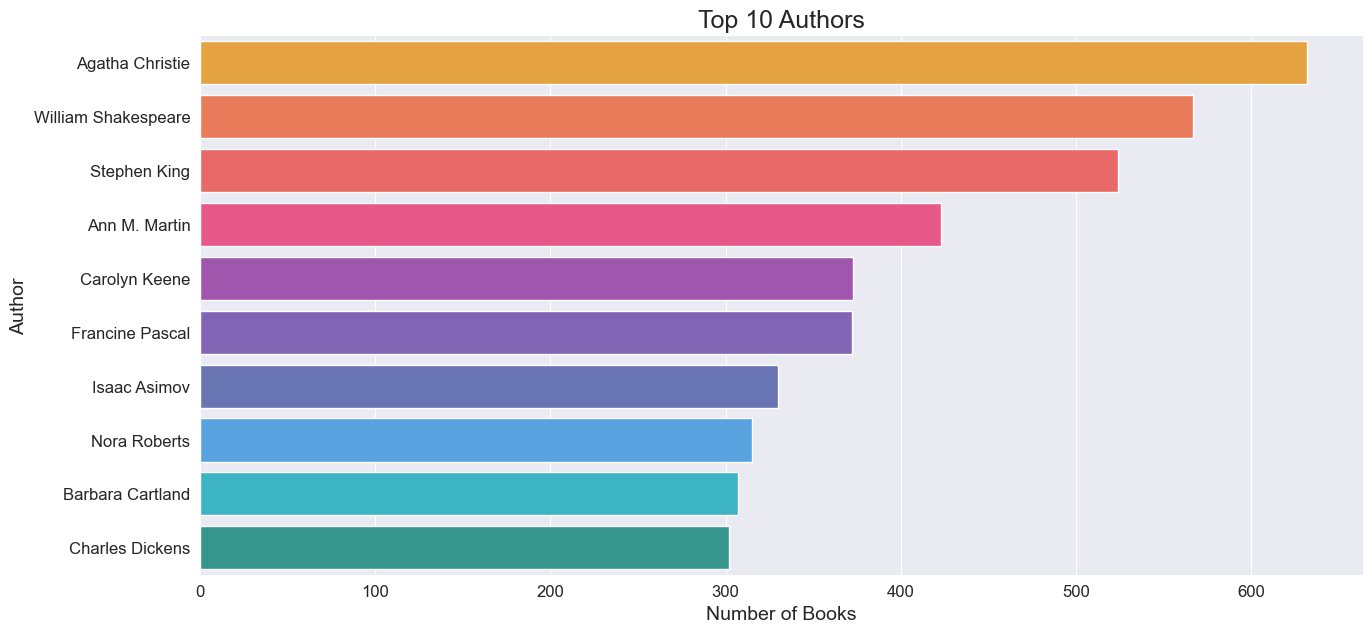

In [71]:
# Set the figure size
plt.figure(figsize=(15, 7))

# Define custom color palette
custom_palette = ['#FFA726', '#FF7043', '#FF5252', '#FF4081', '#AB47BC',
                  '#7E57C2', '#5C6BC0', '#42A5F5', '#26C6DA', '#26A69A']

# Create the countplot
sns.countplot(y='bookAuthor', data=books,
              order=pd.value_counts(books['bookAuthor']).iloc[:10].index,
              palette=custom_palette)

# Set title and axis labels
plt.title('Top 10 Authors', fontsize=18)
plt.xlabel('Number of Books', fontsize=14)
plt.ylabel('Author', fontsize=14)

# Customize tick labels and font size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Remove the right and top spines
sns.despine()

# Display the plot
plt.show()

- From this we conclude the top 10 author which have written the most Books
- why: It will provide valuable insights into the Author popularity, Author influence, Genre specialization etc.

## Top 10 Publisher which have published the most books.

Text(0.5, 1.0, 'Top 10 Publishers')

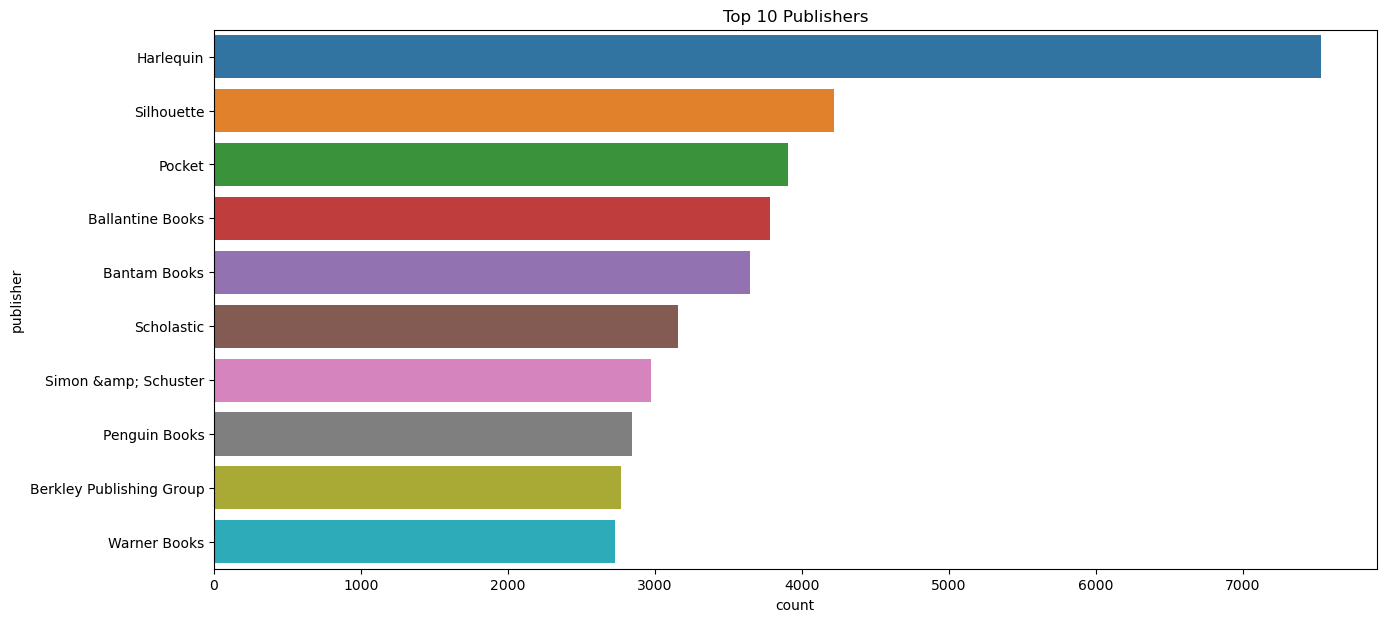

In [33]:
plt.figure(figsize=(15,7))
sns.countplot(y='publisher',data=books,order=pd.value_counts(books['publisher']).iloc[:10].index)
plt.title('Top 10 Publishers')

- Here we got the top 10 publisher who have published most books over the year
- This information can indicate the publishers that have a significant presence in the industry and may suggest their ability to attract and work with a large number of authors or produce a wide range of titles.

## Visualising top 10 most read books

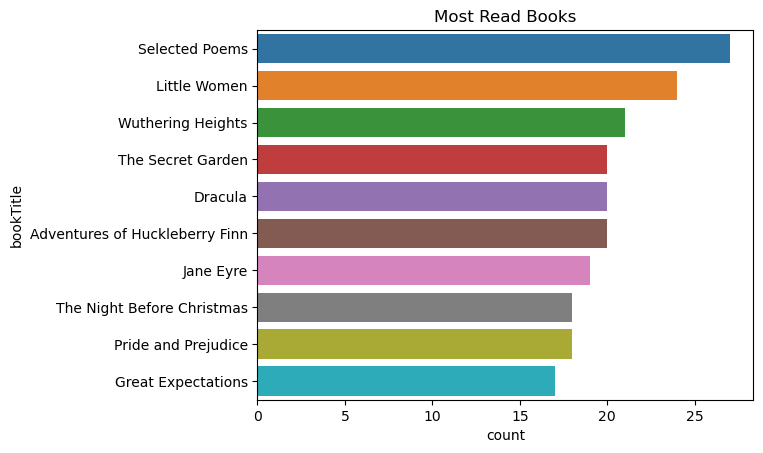

In [34]:
most_read = books.bookTitle.value_counts().reset_index()
most_read.columns = ['bookTitle','count']

plt.figure()
plt.title("Most Read Books")
sns.barplot(x = 'count', y = 'bookTitle', data= most_read.head(10));

- What : I am visualising top 30 most read books
- Why : to gain insights into popular and trending books, so I can understand user preferences, and improve personalization.
- How : By using Series.value_counts() and sns.barplot for creating data and visualisation respectively.

## Visualising top 10 years with most book being published

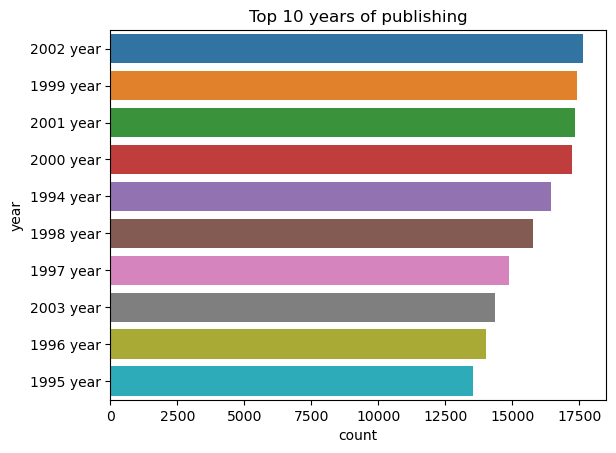

In [35]:
year = books['yearOfPublication'].value_counts().reset_index()
year.columns = ['value', 'count']
year['year'] = year['value'].astype(str) + ' year'
year = year.sort_values('count',ascending=False)
plt.figure()
plt.title('Top 10 years of publishing')
sns.barplot(data = year.head(10), x='count', y="year");

- What: We have visualize top 30 year with most book published
- Why: we can gain insights into publishing trends and patterns over time. This can help you understand if there were specific periods of increased publishing activity or if the number of books published has been steadily increasing over the years. Publishing patterns: Examining the distribution of book publications over time can reveal patterns such as cyclic trends, periods of innovation or decline, or changes in genres or topics that are popular during different years.

# Checking Users Data

In [36]:
users.isnull().sum()

userId           0
Location         0
Age         110762
dtype: int64

In [37]:
users.duplicated().sum()

0

In [38]:
users.duplicated('userId').sum()

0

In [39]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   userId    278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


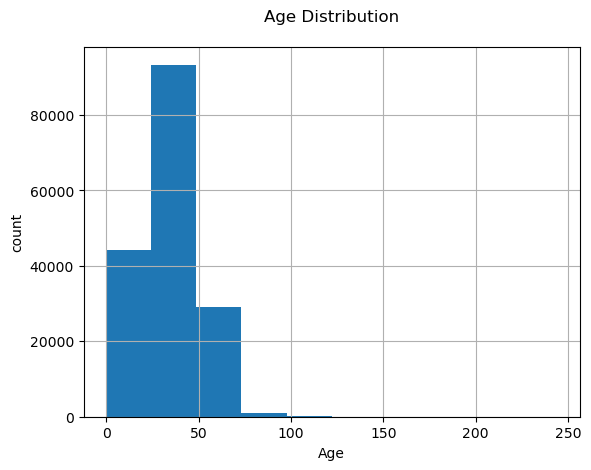

In [40]:
users.Age.hist()
plt.title('Age Distribution\n')
plt.xlabel('Age')
plt.ylabel('count')
plt.show()

- Here we are visualizing the age distribuition of the users who are reading the books
- From here we conclude that there are many users who have 0 age and age more than 100.
- So we will find the unqiue values.

In [41]:
users['Age'].unique()

array([ nan,  18.,  17.,  61.,  26.,  14.,  25.,  19.,  46.,  55.,  32.,
        24.,  20.,  34.,  23.,  51.,  31.,  21.,  44.,  30.,  57.,  43.,
        37.,  41.,  54.,  42.,  50.,  39.,  53.,  47.,  36.,  28.,  35.,
        13.,  58.,  49.,  38.,  45.,  62.,  63.,  27.,  33.,  29.,  66.,
        40.,  15.,  60.,   0.,  79.,  22.,  16.,  65.,  59.,  48.,  72.,
        56.,  67.,   1.,  80.,  52.,  69.,  71.,  73.,  78.,   9.,  64.,
       103., 104.,  12.,  74.,  75., 231.,   3.,  76.,  83.,  68., 119.,
        11.,  77.,   2.,  70.,  93.,   8.,   7.,   4.,  81., 114., 230.,
       239.,  10.,   5., 148., 151.,   6., 101., 201.,  96.,  84.,  82.,
        90., 123., 244., 133.,  91., 128.,  94.,  85., 141., 110.,  97.,
       219.,  86., 124.,  92., 175., 172., 209., 212., 237.,  87., 162.,
       100., 156., 136.,  95.,  89., 106.,  99., 108., 210.,  88., 199.,
       147., 168., 132., 159., 186., 152., 102., 116., 200., 115., 226.,
       137., 207., 229., 138., 109., 105., 228., 18

- Here we can see we have age more than 100, which is invalid.
- So we take the age from range (5,100) and in place of the nan values we put the mean values

In [42]:
users.loc[(users['Age'] > 100) | (users['Age'] < 5)] = np.nan
users['Age'].fillna((users['Age'].mean()), inplace=True)
users['Age']= users['Age'].astype('int64')
users['Age'].unique()

array([ 34,  18,  17,  61,  26,  14,  25,  19,  46,  55,  32,  24,  20,
        23,  51,  31,  21,  44,  30,  57,  43,  37,  41,  54,  42,  50,
        39,  53,  47,  36,  28,  35,  13,  58,  49,  38,  45,  62,  63,
        27,  33,  29,  66,  40,  15,  60,  79,  22,  16,  65,  59,  48,
        72,  56,  67,  80,  52,  69,  71,  73,  78,   9,  64,  12,  74,
        75,  76,  83,  68,  11,  77,  70,  93,   8,   7,  81,  10,   5,
         6,  96,  84,  82,  90,  91,  94,  85,  97,  86,  92,  87, 100,
        95,  89,  99,  88,  98], dtype=int64)

In [43]:
# For visualization which are the age groups are more 
def age_group(age):
    if age<15:
        x='Children'
    elif age>=15 and age<35:
        x='Youth'
    elif age>=35 and age<65:
        x='Adults'
    else:
        x='Senior Citizens'
    return x

- Here we have categories the data into different age groups for visualization purpose.

In [44]:
users['Age_group']=users['Age'].apply(lambda x: age_group(x))

<AxesSubplot:xlabel='Age_group', ylabel='count'>

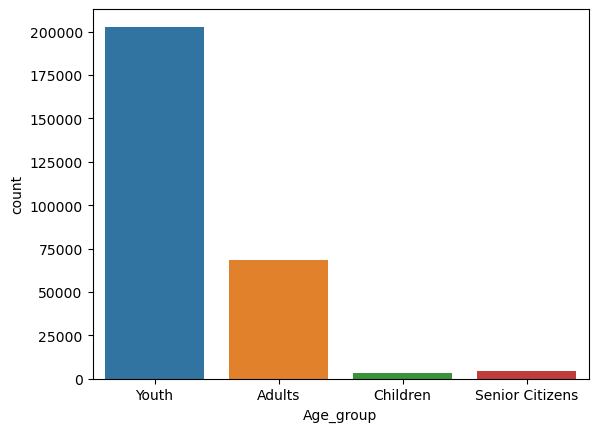

In [45]:
#Age distribution of users
sns.countplot(users['Age_group'])

- From this graph we conclude that Youth are reading the most books followed by adults and childrens.

#### In below cells we are extracting the Country name from the location column,

In [46]:
# defining a function to extract the country names
def get_country(x):
    if isinstance(x, float):
        x = str(x)
    return x.split(',')[-1]

In [47]:
#applying the function the location column
new_user = users.copy(deep=True)
new_user['country'] = users['Location'].apply(get_country)

In [48]:
new_user

,userId,Location,Age,Age_group,country
0,1.0,"nyc, new york, usa",34,Youth,usa
1,2.0,"stockton, california, usa",18,Youth,usa
2,3.0,"moscow, yukon territory, russia",34,Youth,russia
3,4.0,"porto, v.n.gaia, portugal",17,Youth,portugal
4,5.0,"farnborough, hants, united kingdom",34,Youth,united kingdom
...,...,...,...,...,...
278853,278854.0,"portland, oregon, usa",34,Youth,usa
278854,278855.0,"tacoma, washington, united kingdom",50,Adults,united kingdom
278855,278856.0,"brampton, ontario, canada",34,Youth,canada
278856,278857.0,"knoxville, tennessee, usa",34,Youth,usa


In [49]:
new_user['country']

0                     usa
1                     usa
2                  russia
3                portugal
4          united kingdom
               ...       
278853                usa
278854     united kingdom
278855             canada
278856                usa
278857            ireland
Name: country, Length: 278858, dtype: object

In [50]:
# TO know the unique values in the country column
new_user['country'].unique()

array([' usa', ' russia', ' portugal', ' united kingdom', ' canada',
       ' spain', ' australia', ' brazil', '', ' germany', ' mexico',
       ' china', ' italy', ' distrito federal', ' france', ' netherlands',
       ' iraq', ' finland', ' new zealand', ' india', ' ghana',
       ' switzerland', ' slovenia', ' iran', ' peru',
       ' bosnia and herzegovina', ' vietnam', ' sri lanka', ' pakistan',
       ' denmark', ' belgium', ' malaysia', ' u.a.e', ' turkey',
       ' philippines', ' greece', 'nan', ' norway', ' kuwait', ' chile',
       ' quit', ' lj', ' taiwan', ' denmark"', ' españa', ' sweden',
       ' argentina', ' nigeria', ' london', ' bulgaria', ' austria',
       ' romania', ' singapore', ' egypt', ' tunisia', ' uzbekistan',
       ' qatar', ' syria', ' indonesia', ' sudan', ' saudi arabia',
       ' somewherein space', ' poland', ' thailand', ' ireland',
       ' malaysia"', ' venezuela', ' paraguay', ' mozambique', ' morocco',
       ' afghanistan', ' estonia', ' colom

In [51]:
new_user['country']=new_user['country'].astype('str')

In [73]:
new_user['country'].replace(['01776', '02458', '19104', '23232', '30064', '85021', '87510', 'None'],
                        ['usa','usa','usa','usa','usa','usa','usa','others'],inplace=True)

Text(0.5, 1.0, 'Count of users Country wise')

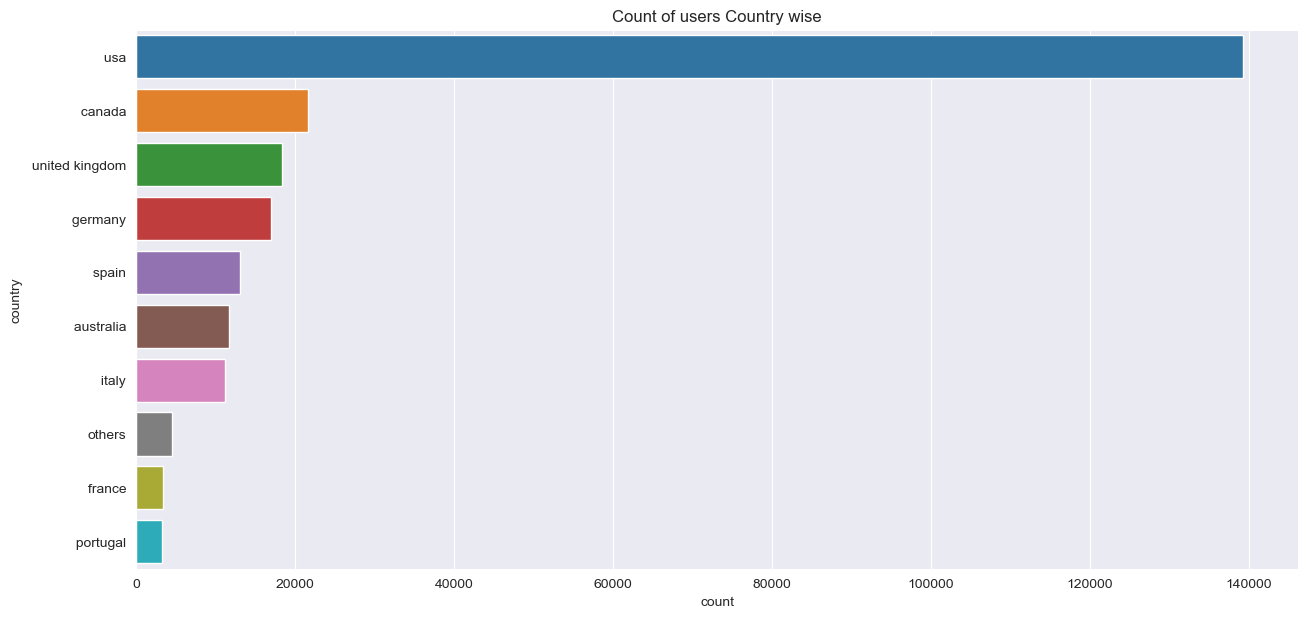

In [74]:
plt.figure(figsize=(15,7))
sns.countplot(y='country',data=new_user,order=pd.value_counts(new_user['country']).iloc[:10].index)
plt.title('Count of users Country wise')

- From the above column we conclude that we have most of the readers from USA followed by Canada, UK etc.

# Checking Ratings Data

In [54]:
ratings.isnull().sum()

userId        0
ISBN          0
bookRating    0
dtype: int64

In [55]:
ratings.duplicated().sum()

0

In [56]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   userId      1149780 non-null  int64 
 1   ISBN        1149780 non-null  object
 2   bookRating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [57]:
ratings.bookRating.unique()

array([ 0,  5,  3,  6,  8,  7, 10,  9,  4,  1,  2], dtype=int64)

In [58]:
# To know the top rating
ratings.bookRating.value_counts()

0     716109
8     103736
10     78610
7      76457
9      67541
5      50974
6      36924
4       8904
3       5996
2       2759
1       1770
Name: bookRating, dtype: int64

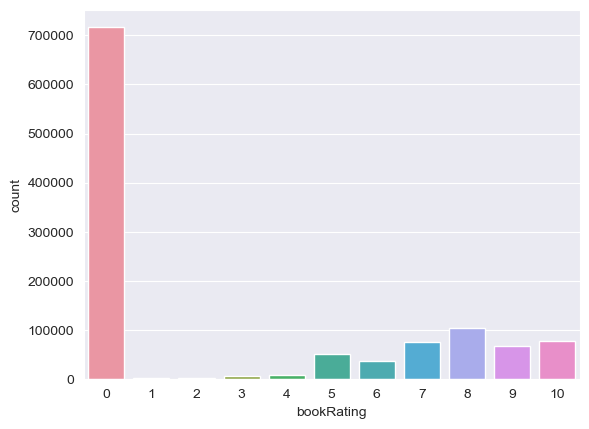

In [59]:
sns.set_style('darkgrid')
sns.countplot(data= ratings , x='bookRating')
plt.show()

- This countplot shows users have rated 0 the most, which can mean they haven't rated bokks at all. We have to separate the explicit ratings represented by 1–10 and implicit ratings represented by 0.

In [60]:
exp_rating= ratings[ratings['bookRating'] != 0]
imp_rating= ratings[ratings['bookRating'] == 0]

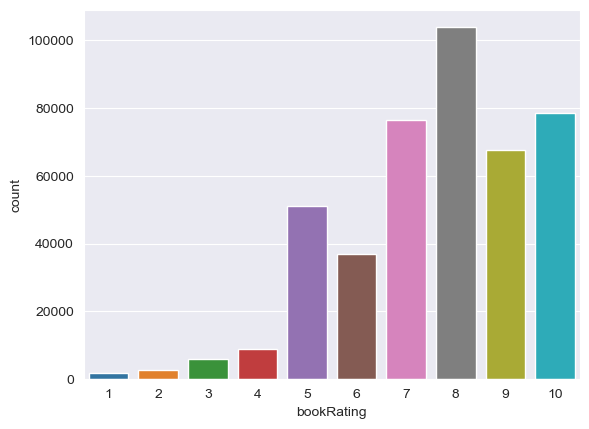

In [61]:
sns.set_style('darkgrid')
sns.countplot(data= exp_rating , x='bookRating')
plt.show()

- From above graph we conclude the rating, users have giving 8 as the most rating.

# Merging the Dataset

In [62]:
merged_data = pd.merge(books, ratings, on='ISBN')
merged_data.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlM,userId,bookRating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,2,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,8,5
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,11400,0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,11676,8
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,41385,0


In [63]:
data = pd.merge(merged_data, new_user,  on='userId')
data.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlM,userId,bookRating,Location,Age,Age_group,country
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,2,0,"stockton, california, usa",18,Youth,usa
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,8,5,"timmins, ontario, canada",34,Youth,canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,8,0,"timmins, ontario, canada",34,Youth,canada
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,8,0,"timmins, ontario, canada",34,Youth,canada
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,8,0,"timmins, ontario, canada",34,Youth,canada


# Data Visualization

### Top rated books on the basis of Average Rating

In [64]:
top_rated = data[['bookTitle','bookRating']]
top_rated = top_rated.groupby('bookTitle', as_index=False)['bookRating'].mean()
top_rated = top_rated.sort_values('bookRating',ascending=False).reset_index()
top_rated = top_rated[['bookTitle','bookRating']]

top_rated.head()

,bookTitle,bookRating
0,Usborne Greek Myths (Usborne Miniature Editions),10.0
1,Facts on File Dictionary of Cultural and Histo...,10.0
2,Photomosaics,10.0
3,LÃ?Â©on,10.0
4,Fade to Black (Point Crime S.),10.0


In [65]:
top_rated.tail()

,bookTitle,bookRating
240503,Deficit Ending,0.0
240504,Promise of Fire,0.0
240505,Promise in Paradise,0.0
240506,Promise Twice: A Murder Mystery,0.0
240507,Simple Signs (Picture Puffins),0.0


- What : I have made a different dataframe to store the top rated books on the basis of there average rating.
- How : I have made a dataframe as top_rated with booktitle and take the average rating for the indiviual book to store it in bookrating column
- Why : There are many books which are rate only once, so this cannot show us good visualization.

### Graph representing most frequently rated Authors

In [66]:
# ratings count per author
auth_rating=data.groupby(['bookAuthor'])['bookRating'].count().sort_values(ascending=False).reset_index()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Stephen King'),
  Text(1, 0, 'Nora Roberts'),
  Text(2, 0, 'John Grisham'),
  Text(3, 0, 'James Patterson'),
  Text(4, 0, 'Mary Higgins Clark'),
  Text(5, 0, 'Dean R. Koontz'),
  Text(6, 0, 'Tom Clancy'),
  Text(7, 0, 'Danielle Steel'),
  Text(8, 0, 'Sue Grafton'),
  Text(9, 0, 'Janet Evanovich'),
  Text(10, 0, 'Anne Rice')])

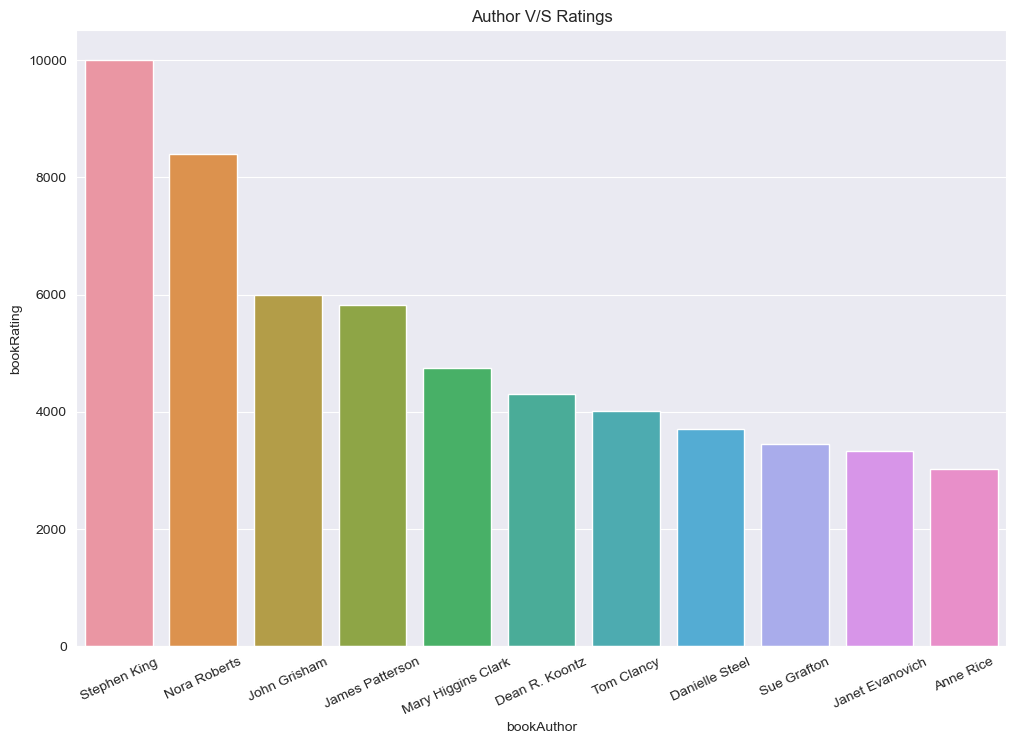

In [67]:
plt.figure(figsize=(12,8))
sns.barplot(auth_rating[auth_rating['bookRating']>3000]['bookAuthor'],auth_rating[auth_rating['bookRating']>3000]['bookRating'])
plt.title('Author V/S Ratings')
plt.xticks(rotation=25)

- The purpose of creating this graph is to analyze and understand which authors have received the most ratings from readers or reviewers. By examining the frequency of ratings, you can gain insights into the popularity, influence, and reception of different authors' works.

### Most frequently rated books by the users

In [68]:
#Book ratings count using group by
book_rating=data.groupby(['bookTitle'])['bookRating'].count().sort_values(ascending=False).reset_index()

Text(0, 0.5, 'Book-Titles')

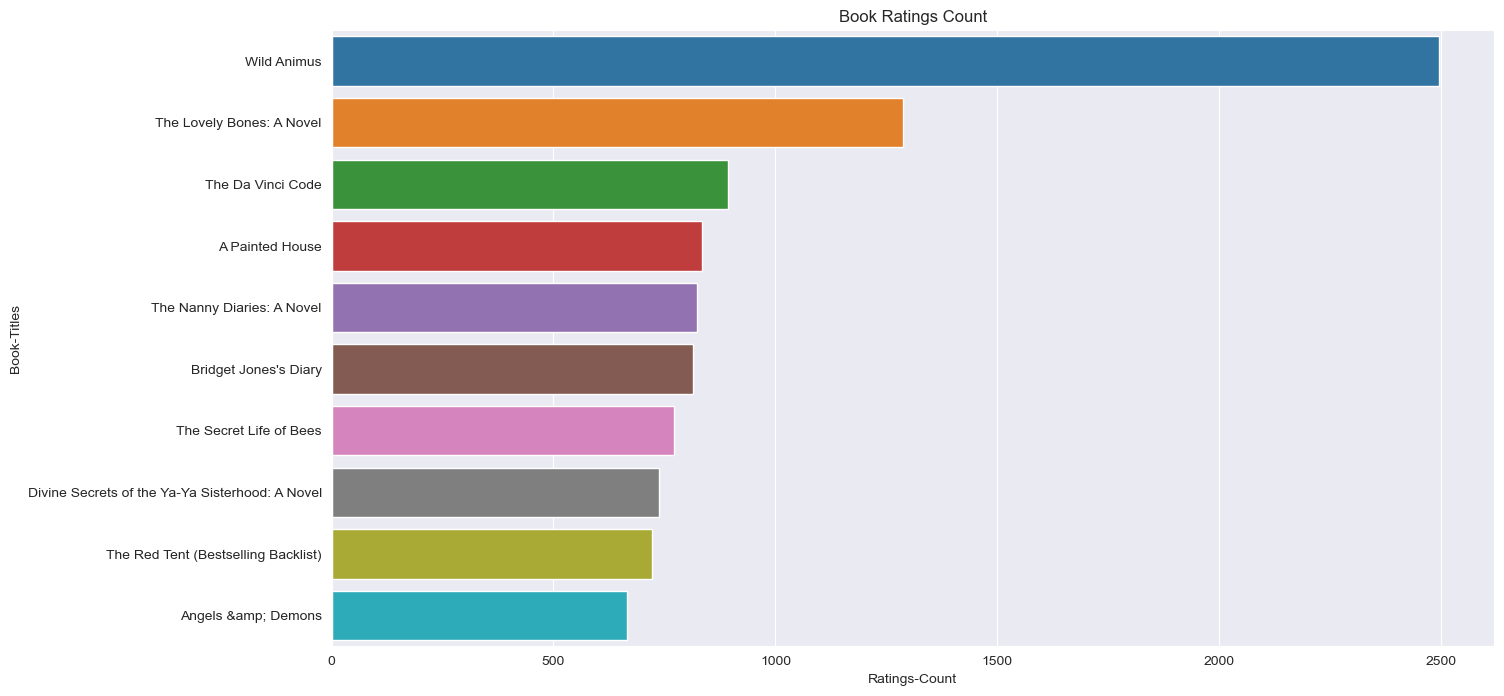

In [69]:
plt.figure(figsize=(15,8))
sns.barplot(book_rating['bookRating'][:10],book_rating['bookTitle'][:10])
plt.title('Book Ratings Count')
plt.xlabel('Ratings-Count')
plt.ylabel('Book-Titles')

- From the above graph we conclude the top 10 most rated books by the users.

### Country with most Reader

In [ ]:
## #Identifying what % of customers are coming from different countries
new_user = pd.DataFrame(new_user.country.value_counts(normalize=True)).reset_index()
new_user.columns = ['countries','value_counts']

In [ ]:
#Labeling countries with low customer % as other
new_user['countries'] = new_user.apply(lambda x: 'other' if (x['value_counts'] < 0.01 or x['countries'] == '') else x['countries'],axis=1)

In [ ]:
#Grouping the customer % from 'other' countries 
new_user = new_user.groupby('countries')['value_counts'].sum().reset_index()

In [ ]:
#Every country has now just one occurance
new_user.countries.value_counts()

In [ ]:
country_list = ['Australia', 'Canada', 'France', 'Germany', 'Italy', 'Netherlands', 'New Zealand', 'Portugal', 'Spain', 'United Kingdom', 'USA']
country_list

In [ ]:
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

import matplotlib.pyplot as plt

plt.title("Country Representation in the Data Set")
plt.bar(new_user['countries'], new_user['value_counts'], color=colors)
plt.xlabel("Country")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


### Plot to represent Age group that rated books the most

In [ ]:
# Calculating the rating count given to each book by the user.
rating_count = data.groupby('bookTitle')['bookRating'].count().to_frame()

In [ ]:
plt.figure(figsize=(10, 6))
data.groupby('Age_group')['bookRating'].count().plot(kind='bar')
plt.title("Number of Ratings by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
data.groupby('country')['bookRating'].count().plot(kind='bar')
plt.title("Number of Ratings by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

## Relationship between Rating Values and Year of Publication

In [ ]:
# Create the scatter plot
plt.scatter(x='yearOfPublication', y='bookRating', data= data, alpha=0.5)

# Set plot title and labels
plt.title('Relationship between Rating Values and Year of Publication')
plt.xlabel('Year of Publication')
plt.ylabel('Rating Value')

# Display the plot
plt.show()

- By plotting rating values against the year of publication, you can explore if there is any correlation or trend between the rating given and the publication year of the books.

# Collaborative Filtering Based Recommender System

- This implementation focuses on finding similar items (books) based on user ratings and recommending books that are similar to a given book.

In [ ]:
num_rating_df = data.groupby('bookTitle').count()['bookRating'].reset_index()
num_rating_df.rename(columns={'bookRating':'num_ratings'},inplace=True)
num_rating_df

In [ ]:
avg_rating_df = data.groupby('bookTitle').mean()['bookRating'].reset_index()
avg_rating_df.rename(columns={'bookRating':'avg_rating'},inplace=True)
avg_rating_df

In [ ]:
popular_df = num_rating_df.merge(avg_rating_df,on='bookTitle')
popular_df

In [ ]:
x = data.groupby('userId').count()['bookRating'] > 200
regular_reader = x[x].index

Here we are using only that users who had rated more than 200 books to over come the sparsity issue.

In [ ]:
regular_reader

In [ ]:
filtered_rating = data[data['userId'].isin(regular_reader)]

here we are getting only regular reader from the main data set

In [ ]:
filtered_rating

In [ ]:
# here we are getting only those books which are rated more than 50 times
y = filtered_rating.groupby('bookTitle').count()['bookRating']>=50
famous_books = y[y].index
famous_books

In [ ]:
# here we have the final data with readers who have rated more than 200 books and books with more than 50 ratings
final_ratings = filtered_rating[filtered_rating['bookTitle'].isin(famous_books)]
final_ratings

In [ ]:
final_ratings['userId'].unique()

In [ ]:
pt = final_ratings.pivot_table(index='bookTitle',columns='userId',values='bookRating')

In [ ]:
pt.fillna(0,inplace=True)

In [ ]:
pt

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
#here we are finding cosine similarity of every rows with each other. 
#Basically we are finding euclidean distance of each book with other book.
similarity_scores = cosine_similarity(pt)

In [ ]:
similarity_scores

In [ ]:
similarity_scores.shape